In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt


#create 3d array to hold data [ [ [x_p1_t0, x_p2_t0, x_p3_t0, ...],[y_p1_t0, y_p2_t0, ...], ... ],
#                              [ [x_p1_t1, x_p2_t1, x_p3_t1, ...],[y_p1_t1, y_p2_t1, ...], ... ],
#                                 . . .
#                              [ [x_p1_tn, x_p2_tn, x_p3_tn, ...],[y_p1_tn, y_p2_tn, ...], ... ] ]



#Open the binary file for reading
f = open("output.dat", "rb")


########## read number of particles (first number in data file) ##########
char_len = 1
char_empty = False
while not char_empty:
    f.seek(0)  #go to first character in file
    data_byte = f.read(char_len)
    num_particles = int(data_byte)
    char_len+=1
    next_char = f.read(1)
    if next_char ==  b" ":
        char_empty = True
        
print("Num particles: " + str(num_particles))

########## read number of timesteps ##########
steps = float(f.read(12))  #non-negative number in scientific notation has 12 characters
steps = int(steps)
print("Number of steps: " + str(steps))

f.read(1)  #read and ignore space

########## read duration ##########
duration = float(f.read(12))
print("Simulation duration: " + str(duration))

f.read(1)

########## read timestep ##########
dt = float(f.read(12))
print("Timestep: " + str(dt))

f.read(1)

########## read axial magnetic field ##########
data_byte = f.read(13) 
if float(data_byte) >= 0:  #if value is non-negative, only read 12 characters
    f.seek(-13,1)
    data_byte = f.read(12)
    Bz = float(data_byte)
else:  #if value is negative, read 13 characters
    Bz = float(data_byte)
f.read(1)

########## read k_z ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    kz = float(data_byte)
else:
    kz = float(data_byte)
f.read(1)

########## read delta ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    delta = float(data_byte)
else:
    delta = float(data_byte)
f.read(1)

########## read omega_R ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    omegaR = float(data_byte)
else:
    omegaR = float(data_byte)
f.read(1)

########## read phi_0 ##########
data_byte = f.read(13)
if float(data_byte) >= 0:
    f.seek(-13,1)
    data_byte = f.read(12)
    phi0 = float(data_byte)
else:
    phi0 = float(data_byte)
f.read(1)

print("Bz: " + str(Bz))
print("kz: " + str(kz))
print("delta: " + str(delta))
print("phi0: " + str(phi0))

########## read charges ##########
charges = np.array([])
for i in range(num_particles):
    data_byte = f.read(13)
    if float(data_byte) >= 0:
        f.seek(-13,1)
        data_byte = f.read(12)
        this_charge = float(data_byte)
        charges = np.append(charges, this_charge)
    else:
        this_charge = float(data_byte)
        charges = np.append(charges, this_charge)
    f.read(1)
    
########## read masses ##########
masses = np.array([])
for i in range(num_particles):
    data_byte = f.read(13)
    if float(data_byte) >= 0:
        f.seek(-13,1)
        data_byte = f.read(12)
        this_mass = float(data_byte)
        masses = np.append(masses, this_mass)
    else:
        this_mass = float(data_byte)
        masses = np.append(masses, this_mass)
        print("ERROR: NEGATIVE MASS")
    f.read(1)

print("Charges:")
print(charges)
print("Masses:")
print(masses)


############################## READ POS. & VEL. AT EACH TIMESTEP ##############################

time_counter = 0  #outermost index of data array, indexes timestep
type_counter = 0  #middle index which tells us to go to i.e. x positions array, or y velocities array, etc
val_counter = 0  #innermost index, indexes particle

data = np.zeros((steps,6,num_particles))

while time_counter < steps:
    #read data for this timestep
    type_array = np.zeros((6, num_particles))  #has form [ [x_p1_t0, x_p2_t0, x_p3_t0, ...],[y_p1_t0, y_p2_t0, ...], ... ]
    while type_counter < 6:
        #for this data type, i.e. y-velocities, read data for each particle
        val_array = np.array([])  #has form [x_p1_t0, x_p2_t0, x_p3_t0, ...]
        while val_counter < num_particles:
            data_byte = f.read(13)
            #print(data_byte)
            if float(data_byte) >= 0 and str(float(data_byte))[0] != '-': #second coniditon is for -0.0e00
                #print(str(float(data_byte)))
                f.seek(-13,1)
                data_byte = f.read(12)
            
            this_val = float(data_byte)
            val_array = np.append(val_array, this_val)

            f.seek(1,1) #skip the space between values
            val_counter+=1
            
        type_array[type_counter] = val_array
        val_counter = 0
        type_counter+=1
    data[time_counter] = type_array
    type_counter=0
    time_counter+=1
    
print(data)


Num particles: 6
Number of steps: 50000
Simulation duration: 5e-05
Timestep: 1e-09
Bz: 4.4588
kz: 233179.8
delta: 0.01382624
phi0: 0.0
Charges:
[1.602177e-19 1.602177e-19 1.602177e-19 1.602177e-19 1.602177e-19
 1.602177e-19]
Masses:
[1.496536e-26 1.496536e-26 1.496536e-26 1.496536e-26 1.496536e-26
 1.496536e-26]
[[[ 3.849323e-09 -2.523512e-06 -2.983562e-06  7.355244e-06 -8.945829e-06
    7.168384e-06]
  [ 8.758611e-09  8.488669e-06 -8.409772e-06  5.079086e-06  2.801201e-07
   -5.349843e-06]
  [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
    0.000000e+00]
  [-1.000457e-02 -9.531415e+00  9.587331e+00 -5.936616e+00 -8.098335e-02
    5.860025e+00]
  [ 4.121521e-03 -3.076962e+00 -3.151820e+00  8.182537e+00 -1.012220e+01
    8.246083e+00]
  [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
    0.000000e+00]]

 [[ 3.839091e-09 -2.533112e-06 -2.974047e-06  7.349496e-06 -8.946139e-06
    7.174425e-06]
  [ 8.755650e-09  8.485817e-06 -8.413140e-06  5

0.0


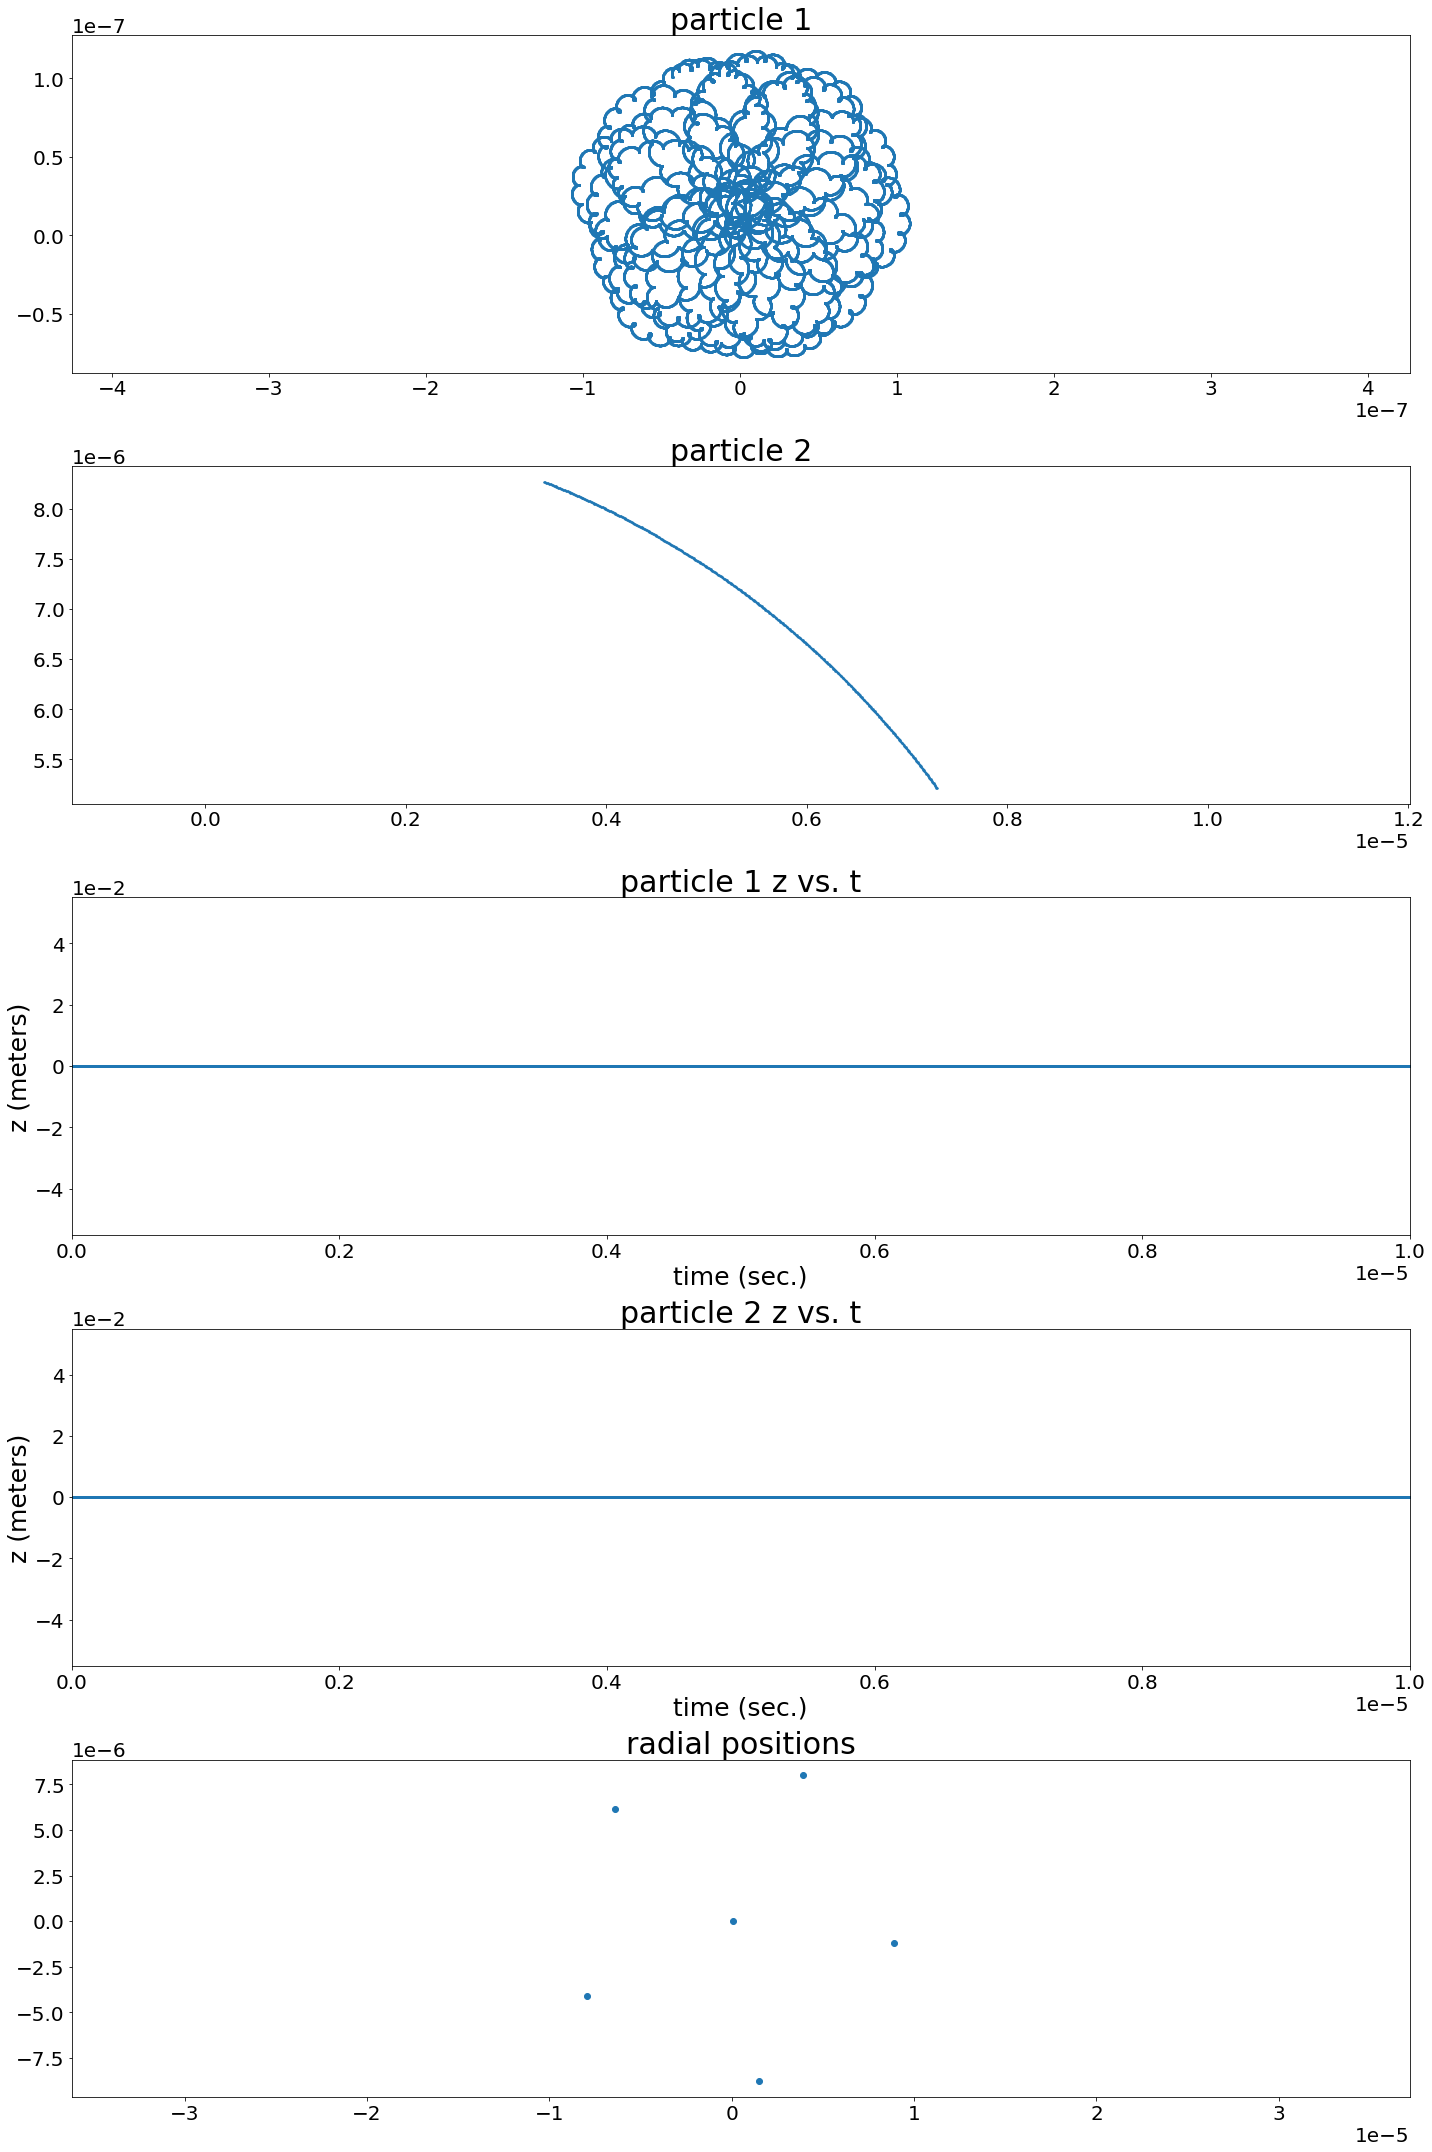

In [3]:
%matplotlib inline

f, axs = plt.subplots(5,1,figsize=(20,30))

time = 450
axs[4].plot(data[time, 0, :], data[time, 1, :], 'o')
axs[4].axis('equal')
axs[4].set_title('radial positions', fontsize=30)
axs[4].tick_params(axis='both', labelsize=20)
axs[4].xaxis.offsetText.set_fontsize(20)
axs[4].yaxis.offsetText.set_fontsize(20)
axs[4].ticklabel_format(style='sci', scilimits = (0,0))

#plot y vs x for particle 1
axs[0].plot(data[:, 0, 0], data[:, 1, 0], '.', ms=3)
axs[0].axis('equal')
axs[0].set_title('particle 1', fontsize=30)
axs[0].tick_params(axis='both', labelsize=20)
axs[0].xaxis.offsetText.set_fontsize(20)
axs[0].yaxis.offsetText.set_fontsize(20)
axs[0].ticklabel_format(style='sci', scilimits = (0,0))

#plot y vs x for particle 2
axs[1].plot(data[10000:10500, 0, 1], data[10000:10500, 1, 1], '.', ms=3)
axs[1].axis('equal')
axs[1].set_title('particle 2', fontsize=30)
axs[1].tick_params(axis='both', labelsize=20)
axs[1].xaxis.offsetText.set_fontsize(20)
axs[1].yaxis.offsetText.set_fontsize(20)
axs[1].ticklabel_format(style='sci', scilimits = (0,0))

#plot z vs t for particle 1
axs[2].plot(dt*np.arange(len(data[:, 2, 0])), data[:, 2, 0], '.', ms=3)
#axs[2].axis('equal')
axs[2].set_xlim(0,1e-05)
axs[2].set_title('particle 1 z vs. t', fontsize=30)
axs[2].set_xlabel('time (sec.)', fontsize=25)
axs[2].set_ylabel('z (meters)', fontsize=25)
axs[2].tick_params(axis='both', labelsize=20)
axs[2].xaxis.offsetText.set_fontsize(20)
axs[2].yaxis.offsetText.set_fontsize(20)
axs[2].ticklabel_format(style='sci', scilimits = (0,0))
print(min(data[:, 2, 0]))

#plot z vs t for particle 2
axs[3].plot(dt*np.arange(len(data[:, 2, 1])), data[:, 2, 1], '.', ms=3)
#axs[2].axis('equal')
axs[3].set_xlim(0,1e-05)
axs[3].set_title('particle 2 z vs. t', fontsize=30)
axs[3].set_xlabel('time (sec.)', fontsize=25)
axs[3].set_ylabel('z (meters)', fontsize=25)
axs[3].tick_params(axis='both', labelsize=20)
axs[3].xaxis.offsetText.set_fontsize(20)
axs[3].yaxis.offsetText.set_fontsize(20)
axs[3].ticklabel_format(style='sci', scilimits = (0,0))

f.tight_layout()

plt.show()


In [36]:
#plt.psd(data[:, 0, 3], Fs=10**9)
#plt.show()

#transform x and y coordinates to rotating frame

start_step = 0
end_step = 40000
omegaRp = omegaR
print(omegaRp/(2*np.pi))
pos_rot = np.empty((end_step-start_step+1, 2, num_particles))
for i in range(start_step, end_step+1):
    this_x = np.array([])
    this_y = np.array([])
    for j in range(num_particles):
        xx = np.cos(omegaRp*dt*i)*data[i,0,j]+np.sin(omegaRp*dt*i)*data[i,1,j] #rotation
        yy = -np.sin(omegaRp*dt*i)*data[i,0,j]+np.cos(omegaRp*dt*i)*data[i,1,j] #rotation
        this_x = np.append(this_x, xx)
        this_y = np.append(this_y, yy)
    pos_rot[i-start_step,0] =this_x
    pos_rot[i-start_step,1] =this_y


179999.94345347016


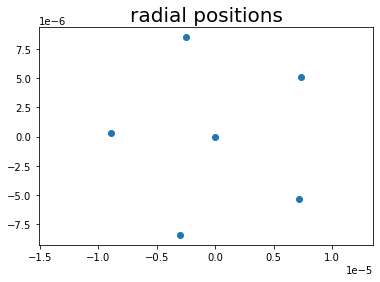

In [38]:
%matplotlib inline
#plot x and y in rotating frame
ax = plt.subplot()
step = 40 #between start_step and end_step
ax.plot(pos_rot[step, 0, :], pos_rot[step, 1, :], 'o')
ax.axis('equal')
ax.set_title('radial positions', fontsize=20)
ax.tick_params(axis='both', labelsize=10)
ax.xaxis.offsetText.set_fontsize(10)
ax.yaxis.offsetText.set_fontsize(10)
ax.ticklabel_format(style='sci', scilimits = (0,0))

In [39]:
#Rotating frame animation
from matplotlib.animation import FuncAnimation

class animate:
    def __init__(self,posall,units=1e6, title = "Title"):
        max_slices = 10**5
        len_slices = np.size(posall[:,0,0])
        if len_slices<max_slices: 
            sl=len_slices
        else: 
            sl=max_slices
        
        self.posall = posall


        self.x = []
        self.y = []

        self.positions1 = self.posall*units


        self.figure, self.ax = plt.subplots(figsize=(12,12))
        self.lim = np.max(np.abs(posall[0,:,:]*units))*1.2
        self.points1, = self.ax.plot(self.x, self.y
                                    ,'bo'
                                    ,zorder=2
                                    ,label='Particle'
                                    ,markersize=5)
        self.lines1, = self.ax.plot(self.x, self.y
                ,'ro'
                ,zorder=1
                ,label='Trail'
                ,markersize=0.1)
        self.ax.legend()
        plt.title(title)
        self.ax.set_xlabel(r'x [$\mu m$]')
        self.ax.set_ylabel(r'y [$\mu m$]')
        self.ax.set_aspect(1)

    def func_animate(self,frame_number,skip=10,tail=10**3,dots_every=1):
        self.ax.set_ylim((-self.lim,self.lim))
        self.ax.set_xlim((-self.lim,self.lim))
        x1 = self.positions1[frame_number*skip,0,:]
        y1 = self.positions1[frame_number*skip,1,:]
        if frame_number*skip-tail >= 0:
            index = np.arange(frame_number*skip-tail,
                                frame_number*skip,
                                dots_every)
            linex1=self.positions1[index,0,:]
            liney1=self.positions1[index,1,:]
        else:
            index = np.arange(0,frame_number*skip,dots_every)
            linex1=self.positions1[index,0,:]
            liney1=self.positions1[index,1,:]

        thetime = 1e-8*float(frame_number*skip)/1e-6
        #self.ax.annotate(r"Time =%1.0f[$\mu s$]" %thetime, xy=(0.1, 0.04),\
        #            xycoords='axes fraction',size=10,\
        #            bbox=dict(boxstyle='round', fc='w'))
        self.points1.set_data(x1,y1)
        self.lines1.set_data(linex1,liney1)

<IPython.core.display.Javascript object>


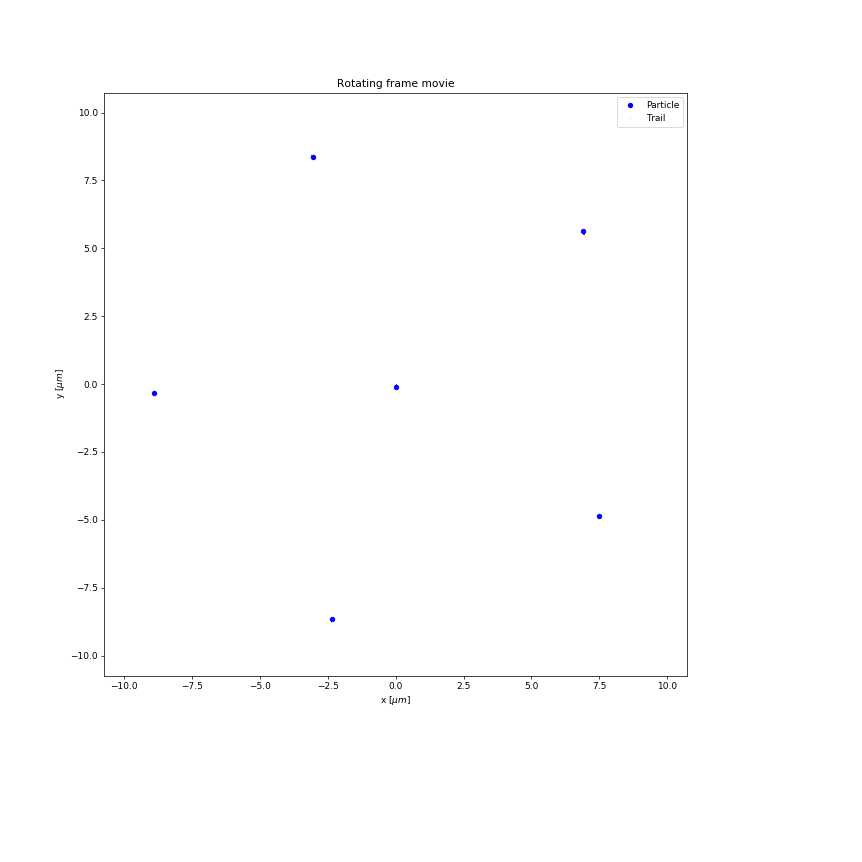

In [44]:
%matplotlib notebook
from matplotlib.animation import FFMpegWriter

rot_anim = animate(pos_rot, title = "Rotating frame movie")
#for i in range(1000):
#    this_anim.func_animate(i)
#ani_rot = FuncAnimation(
#    rot_anim.figure, rot_anim.func_animate, interval=1, save_count = 100, repeat = False)
ani_rot = FuncAnimation(
    rot_anim.figure, rot_anim.func_animate, frames =4000, interval=10)
writervideo = FFMpegWriter(fps=60)
ani_rot.save('rotating_4000frames.mp4', writer=writervideo)


In [46]:
pos_lab = data[:, 0:2, :]
lab_anim = animate(pos_lab, title="Lab frame movie")
#for i in range(1000):
#    this_anim.func_animate(i)
ani_lab = FuncAnimation(
    lab_anim.figure, lab_anim.func_animate, frames = 4000, interval=10)
writervideo = FFMpegWriter(fps=60)
ani_lab.save('lab_4000frames.mp4', writer=writervideo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


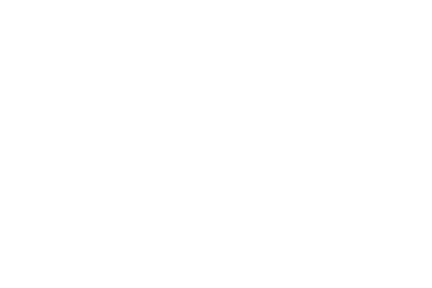

<IPython.core.display.Javascript object>


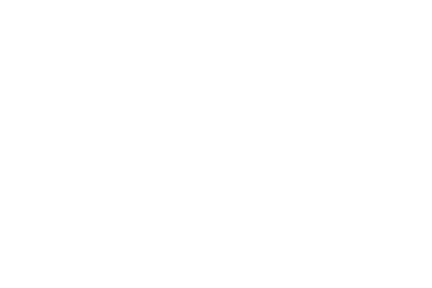

Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [10]:
%matplotlib notebook
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# creating a blank window
# for the animation
fig = plt.figure()
xmin = -0.3*10**-8-4*10**-3
xmax = 0.3*10**-8-4*10**-3
ymin = 0*10**-9
ymax = 4.2*10**-9
axis = plt.axes(xlim =(xmin,xmax),
                ylim =(ymin,ymax))
 
line, = axis.plot([], [], lw = 0.1)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []

# animation function
def animate(i):
    x = data[i,0,0]
    y = data[i,1,0]     
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,

# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 200,
                            interval = 100,
                            blit = True)
 
# saves the animation in our desktop
#anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)

<IPython.core.display.Javascript object>


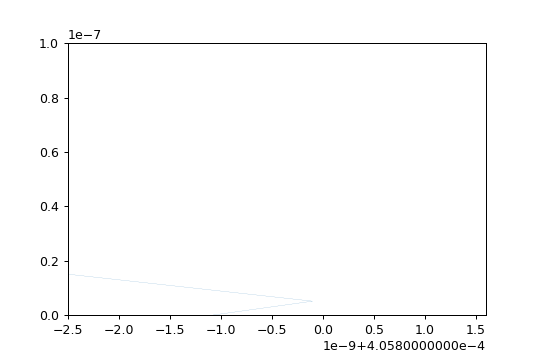

In [300]:
%matplotlib notebook
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# creating a blank window
# for the animation
fig = plt.figure()
xmin = -2.5*10**-9+4.058*10**-4
xmax = 1.6*10**-9+4.058*10**-4
ymin = 0
ymax = 1*10**-7
axis = plt.axes(xlim =(xmin,xmax),
                ylim =(ymin,ymax))
 
line, = axis.plot([], [], lw = 0.1)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []

# animation function
def animate(i):
    x = data[i,0,1]
    y = data[i,1,1]     
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,

# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 200,
                            interval = 20,
                            blit = True)
 
# saves the animation in our desktop
#anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)